In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 시퀀스(리스트, 문자열 등) 안에서 각 원소가 몇 번 등장했는지 세주는 빈도 계산 도구 -> 우리는 최빈값 계산할 때 사용
from collections import Counter

np.random.seed(42)

# 몇가지 tool을 함수로 만들어 놓은것

def summary_stats(series, is_continuous=True, bins=50):
    mean = float(series.mean())
    median = float(series.median())
    std = float(series.std(ddof=1))
    if is_continuous:
        counts, edges = np.histogram(series, bins=bins)
        idx = int(np.argmax(counts))
        mode_est = float((edges[idx] + edges[idx+1]) / 2.0)
    else:
        c = Counter(series.tolist())
        mode_est = float(Counter(series.tolist()).most_common(1)[0][0])
    return {"mean": mean, "median": median, "mode": mode_est, "std": std}

def savefig(name):
    path = f"{name}.png"
    plt.tight_layout()
    plt.savefig(path, dpi=180, bbox_inches="tight")
    plt.show()
    print(f"Saved figure to {path}")

def annualized_stats(monthly_returns):
    monthly_geom = np.prod(1 + monthly_returns) ** (1/len(monthly_returns)) - 1
    ann_return = (1 + monthly_geom) ** 12 - 1
    ann_std = np.std(monthly_returns, ddof=1) * np.sqrt(12)
    return float(ann_return), float(ann_std)

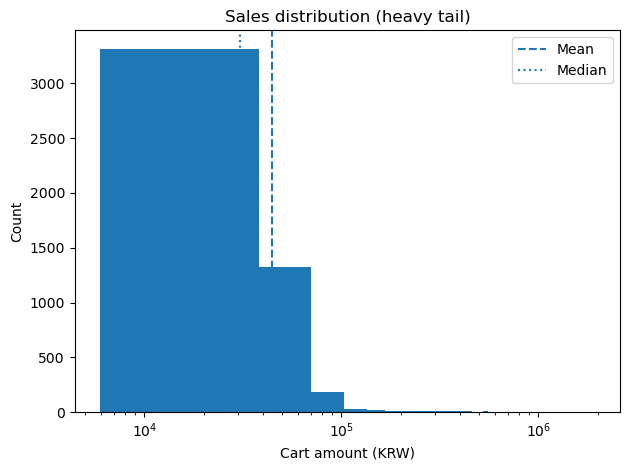

Saved figure to sales_hist.png


In [11]:
n = 5000
regular = np.random.lognormal(mean=np.log(30000), sigma=0.5, size=int(n*0.97))  # typical carts around 30k KRW
vip = np.random.lognormal(mean=np.log(300000), sigma=0.6, size=int(n*0.03))     # VIP big orders
sales = pd.Series(np.concatenate([regular, vip]))

stats_sales = summary_stats(sales, is_continuous=True, bins=60)
stats_sales["scenario"] = "Sales (KRW)"

# Plot histogram
plt.figure()
plt.hist(sales, bins=60)
plt.xlabel("Cart amount (KRW)")
plt.ylabel("Count")
plt.title("Sales distribution (heavy tail)")
plt.xscale("log")
plt.axvline(stats_sales["mean"], linestyle="--", label="Mean")
plt.axvline(stats_sales["median"], linestyle=":", label="Median")
plt.legend()
savefig("sales_hist")

In [12]:
stats_sales

{'mean': 44537.423285731085,
 'median': 30733.369886916327,
 'mode': 22067.979330041737,
 'std': 79956.02282550688,
 'scenario': 'Sales (KRW)'}

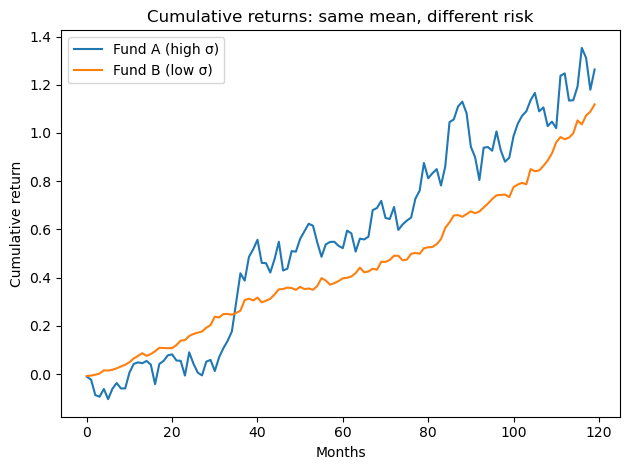

Saved figure to funds_cumulative.png


In [13]:
months = 120  # 10 years
fundA = np.random.normal(loc=0.006, scale=0.04, size=months)  # high vol
fundB = np.random.normal(loc=0.006, scale=0.01, size=months)  # low vol

ann_ret_A, ann_std_A = annualized_stats(fundA)
ann_ret_B, ann_std_B = annualized_stats(fundB)

stats_fundA = {"mean": ann_ret_A, "median": float(np.median(fundA))*12, "mode": float(pd.Series(fundA).mode().iloc[0]), "std": ann_std_A, "scenario": "Fund A (annualized)"}
stats_fundB = {"mean": ann_ret_B, "median": float(np.median(fundB))*12, "mode": float(pd.Series(fundB).mode().iloc[0]), "std": ann_std_B, "scenario": "Fund B (annualized)"}

# Plot
plt.figure()
cum_A = np.cumprod(1 + fundA) - 1
cum_B = np.cumprod(1 + fundB) - 1
plt.plot(cum_A, label="Fund A (high σ)")
plt.plot(cum_B, label="Fund B (low σ)")
plt.xlabel("Months")
plt.ylabel("Cumulative return")
plt.title("Cumulative returns: same mean, different risk")
plt.legend()
savefig("funds_cumulative")

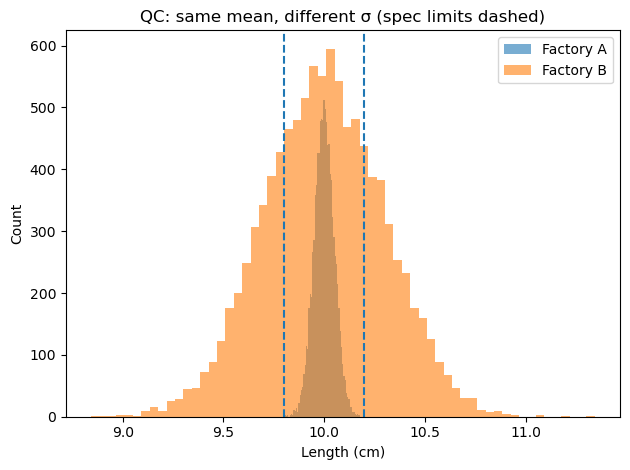

Saved figure to qc_hist_overlay.png


In [15]:
n_parts = 10000
factoryA = np.random.normal(loc=10.0, scale=0.05, size=n_parts)  # tight
factoryB = np.random.normal(loc=10.0, scale=0.3, size=n_parts)   # loose

spec_low, spec_high = 9.8, 10.2
defectA = np.mean((factoryA < spec_low) | (factoryA > spec_high))
defectB = np.mean((factoryB < spec_low) | (factoryB > spec_high))

stats_A = summary_stats(pd.Series(factoryA), is_continuous=True, bins=60)
stats_A.update({"scenario": "Factory A length (cm)", "defect_rate": float(defectA)})
stats_B = summary_stats(pd.Series(factoryB), is_continuous=True, bins=60)
stats_B.update({"scenario": "Factory B length (cm)", "defect_rate": float(defectB)})

# Histogram
plt.figure()
plt.hist(factoryA, bins=60, alpha=0.6, label="Factory A")
plt.hist(factoryB, bins=60, alpha=0.6, label="Factory B")
plt.axvline(spec_low, linestyle="--")
plt.axvline(spec_high, linestyle="--")
plt.xlabel("Length (cm)")
plt.ylabel("Count")
plt.title("QC: same mean, different σ (spec limits dashed)")
plt.legend()
savefig("qc_hist_overlay")

In [16]:
stats_A

{'mean': 9.999972321116019,
 'median': 9.999791387491616,
 'mode': 9.99948069269779,
 'std': 0.05025272830473992,
 'scenario': 'Factory A length (cm)',
 'defect_rate': 0.0}

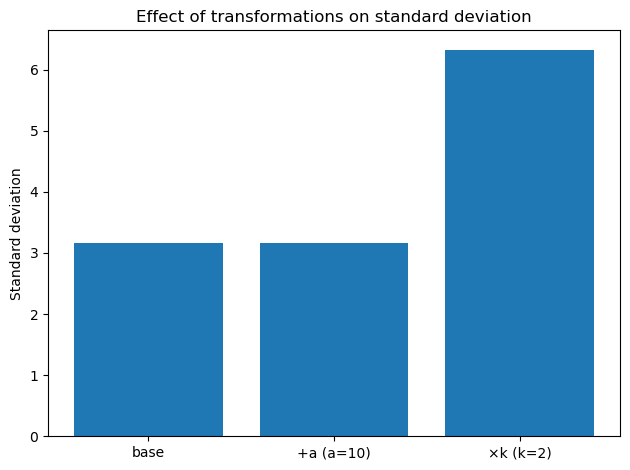

Saved figure to transform_std.png


In [17]:
x = np.array([2, 4, 6, 8, 10], dtype=float)
plus_a = x + 10
times_k = x * 2
std_base = float(np.std(x, ddof=1))
std_plus_a = float(np.std(plus_a, ddof=1))
std_times_k = float(np.std(times_k, ddof=1))
df_transform = pd.DataFrame({
    "dataset": ["base", "+a (a=10)", "×k (k=2)"],
    "std": [std_base, std_plus_a, std_times_k],
    "mean": [float(np.mean(x)), float(np.mean(plus_a)), float(np.mean(times_k))]
})

# Bar chart
plt.figure()
plt.bar(df_transform["dataset"], df_transform["std"])
plt.title("Effect of transformations on standard deviation")
plt.ylabel("Standard deviation")
savefig("transform_std")

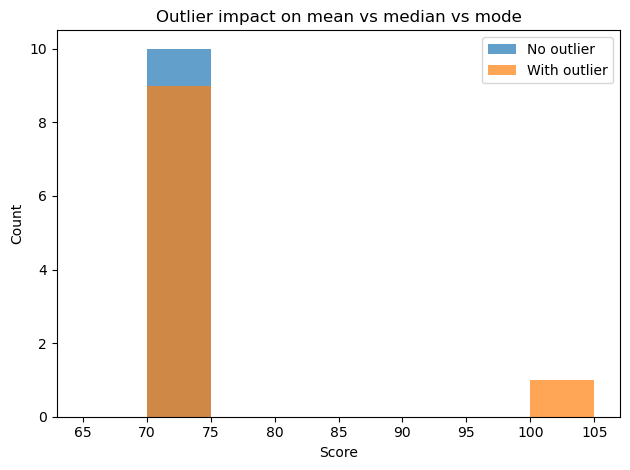

Saved figure to outlier_hist.png


In [19]:
base_scores = np.array([70]*9 + [70])
with_outlier = np.array([70]*9 + [100])
scores_base = pd.Series(base_scores)
scores_out = pd.Series(with_outlier)

stats_base = {"mean": float(scores_base.mean()), "median": float(scores_base.median()), "mode": float(scores_base.mode().iloc[0]), "std": float(scores_base.std(ddof=1)), "scenario": "Scores (no outlier)"}
stats_out = {"mean": float(scores_out.mean()), "median": float(scores_out.median()), "mode": float(scores_out.mode().iloc[0]), "std": float(scores_out.std(ddof=1)), "scenario": "Scores (with outlier)"}

#histogram
plt.figure()
plt.hist(scores_base, bins=np.arange(65, 106, 5), alpha=0.7, label="No outlier")
plt.hist(scores_out, bins=np.arange(65, 106, 5), alpha=0.7, label="With outlier")
plt.xlabel("Score")
plt.ylabel("Count")
plt.title("Outlier impact on mean vs median vs mode")
plt.legend()
savefig("outlier_hist")

평균: 2053.79
중앙값: 674.45
최빈값: 76.32
표준편차: 8988.25


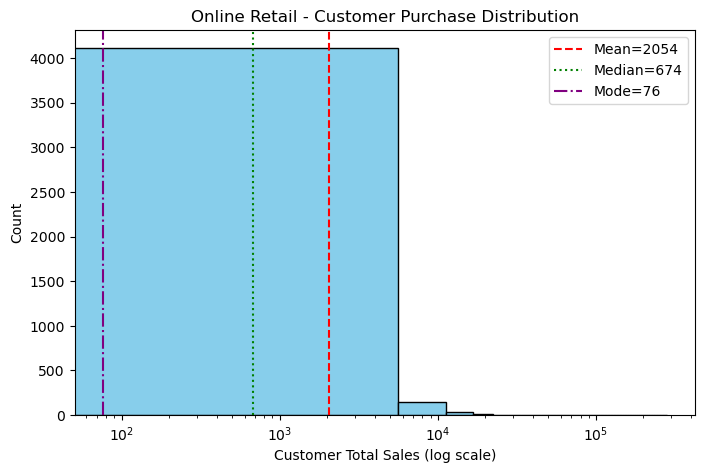

In [21]:
# 데이터 로드 (CSV 파일 경로 수정 필요)
df = pd.read_excel("Online Retail.xlsx")  # UCI 데이터는 xlsx 형식

# 결측치/이상치 제거
df = df.dropna(subset=["CustomerID"])
df = df[df["Quantity"] > 0]
df["Sales"] = df["Quantity"] * df["UnitPrice"]

# 고객별 결제 금액 집계
customer_sales = df.groupby("CustomerID")["Sales"].sum()

# 대표값 계산
mean_val = customer_sales.mean()
median_val = customer_sales.median()
mode_val = customer_sales.mode().iloc[0]
std_val = customer_sales.std()

print(f"평균: {mean_val:.2f}")
print(f"중앙값: {median_val:.2f}")
print(f"최빈값: {mode_val:.2f}")
print(f"표준편차: {std_val:.2f}")

# 히스토그램 (로그 스케일)
plt.figure(figsize=(8,5))
plt.hist(customer_sales, bins=50, color="skyblue", edgecolor="black")
plt.xscale("log")
plt.axvline(mean_val, color="red", linestyle="--", label=f"Mean={mean_val:.0f}")
plt.axvline(median_val, color="green", linestyle=":", label=f"Median={median_val:.0f}")
plt.axvline(mode_val, color="purple", linestyle="-.", label=f"Mode={mode_val:.0f}")
plt.xlabel("Customer Total Sales (log scale)")
plt.ylabel("Count")
plt.title("Online Retail - Customer Purchase Distribution")
plt.legend()
plt.show()


평균(Mean): VIP 소수 때문에 매우 크게 나옴

중앙값(Median): 일반 고객의 전형적인 구매 수준

최빈값(Mode): 실제로 가장 많은 고객이 쓰는 구매 금액대

표준편차(σ): 매출의 변동성(= 안정적인 일반 고객 vs VIP 영향)

VIP 고객 수: 217, 일반 고객 수: 4122
VIP 기준 임계값: 5840.18

전체 고객
{'Mean': 2053.793017746025, 'Median': 674.45, 'Mode': 76.32000000000001, 'Std': 8988.248381377653}

VIP 고객 (상위 5%)
{'Mean': 20688.480230414745, 'Median': 9736.52, 'Mode': 5870.08, 'Std': 35073.15182373498}

일반 고객 (하위 95%)
{'Mean': 1072.782070354197, 'Median': 626.55, 'Mode': 76.32000000000001, 'Std': 1148.2283845244738}


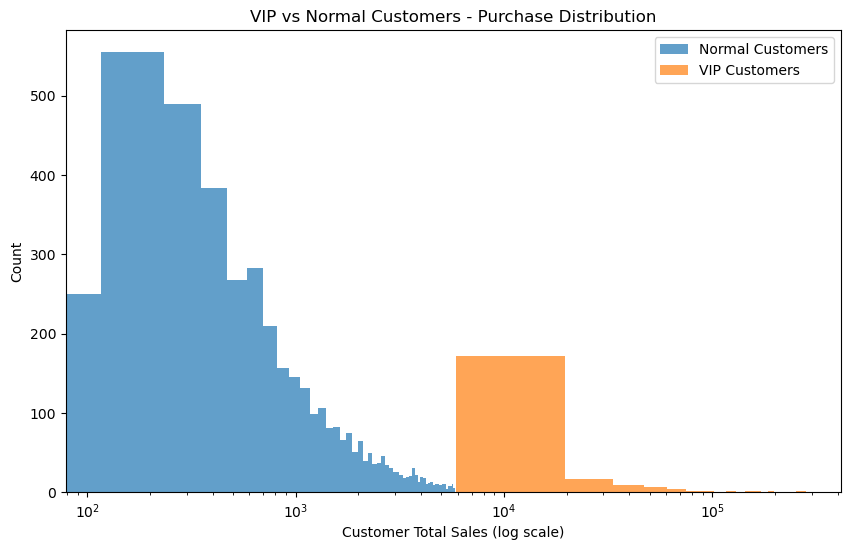

In [22]:
# VIP 상위 5% / 일반 고객 95% 구분
threshold = np.percentile(customer_sales, 95)
vip_sales = customer_sales[customer_sales >= threshold]
normal_sales = customer_sales[customer_sales < threshold]

print(f"VIP 고객 수: {len(vip_sales)}, 일반 고객 수: {len(normal_sales)}")
print(f"VIP 기준 임계값: {threshold:.2f}")

# 대표값 함수
def summary(series):
    return {
        "Mean": series.mean(),
        "Median": series.median(),
        "Mode": series.mode().iloc[0],
        "Std": series.std()
    }

print("\n전체 고객")
print(summary(customer_sales))
print("\nVIP 고객 (상위 5%)")
print(summary(vip_sales))
print("\n일반 고객 (하위 95%)")
print(summary(normal_sales))

# 히스토그램 비교
plt.figure(figsize=(10,6))
plt.hist(normal_sales, bins=50, alpha=0.7, label="Normal Customers")
plt.hist(vip_sales, bins=20, alpha=0.7, label="VIP Customers")
plt.xscale("log")
plt.xlabel("Customer Total Sales (log scale)")
plt.ylabel("Count")
plt.title("VIP vs Normal Customers - Purchase Distribution")
plt.legend()
plt.show()

**전체 고객**

평균은 VIP 영향으로 오른쪽으로 치우침

중앙값·최빈값은 실제 “대부분 고객”의 소액 소비를 반영

---

**VIP (상위 5%)**

평균·중앙값 모두 큰 금액

변동성(σ)도 큼 → 고액 주문이지만 불안정

---

**일반 고객 (하위 95%)**

평균이 훨씬 작음

중앙값과 최빈값이 전체고객의 값과 거의 일치 → 안정적 소비 패턴

---

## 결론

VIP 고객 : 평균과 중앙값이 모두 높고, 표준편차가 매우 큼 → 불안정한 고액 매출층

일반 고객 : 중앙값 ≈ 626, 최빈값 ≈ 76 → “자주 구매하는 소액 단품”과 “전체적인 고객 지출”이 다름을 보여줌

전체 고객 : 평균(2053)이 중앙값(674)보다 훨씬 크다 → VIP 영향으로 평균 착시 발생

In [28]:
! pip install yfinance

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 0.0/949.2 kB ? eta -:--:--
     ---------------------------------------- 949.2/949.2 kB ? eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
   ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
   ------ --------------------------------- 0.3/1.6 MB ? eta -:--:--
   ---------------------------------------- 1.6/1.6 MB 5.4 MB/s eta 0:00:00
  Created wheel for multitasking: filename=multitasking-0.0.12-py3-none-any.whl size=15617 sha256=9d02c3a09155f90b4dac3c3f943b6d17d748eac5e49e8d04605ad726abc7d303
  Stored in directory: c:\users\sju12\appda

In [23]:
import yfinance as yf
import pandas as pd
import numpy as np

# 데이터 불러오기 (삼성전자 예시)
ticker = "005930.KQ"  # 삼성전자 (한국 거래소 코스피)
data = yf.download(ticker, start="2020-01-01", end="2024-12-31")

# 종가 기준 수익률
data["Monthly_Return"] = data["Close"].pct_change()

# 월별 수익률 계산
#monthly_returns = data["Monthly_Return"].resample("M").sum().dropna()
monthly_returns = data["Monthly_Return"].resample("M").apply(lambda x: (1+x).prod()-1).dropna()


# 함수 적용

ann_return, ann_std = annualized_stats(monthly_returns)

print(f"📈 삼성전자 (2020~2024)")
print(f"연환산 수익률: {ann_return*100:.2f}%")
print(f"연환산 변동성: {ann_std*100:.2f}%")

C:\Users\sju12\AppData\Local\Temp\ipykernel_20004\4010004339.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start="2020-01-01", end="2024-12-31")
[*********************100%***********************]  1 of 1 completed

📈 삼성전자 (2020~2024)
연환산 수익률: 1.87%
연환산 변동성: 26.98%



C:\Users\sju12\AppData\Local\Temp\ipykernel_20004\4010004339.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = data["Monthly_Return"].resample("M").apply(lambda x: (1+x).prod()-1).dropna()
